In [14]:
import csv
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
import numpy as np
import cv2
from astropy.coordinates import Angle
from urllib.parse import urlencode
from sklearn.preprocessing import minmax_scale
import re
import requests

# Load and preprocess the images of the planetary nebulae
image_size = 512
fov_threshold = 0.7/60 # arc minutes/60 = degrees

all_images = []
with open('output33.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # Skip the header row
    for row in csv_reader:
        ra = row[2]
        dec = row[3]
        fov_str = row[4]

        # Extract the numeric value from the FOV information string using regular expressions
        match = re.match(r'(\d+(\.\d+)?)', fov_str)
        fov = float(match.group(0))/60.0

        # Select only the objects with size > 0.7 arc min
        if fov > fov_threshold:
            # Convert RA and Dec to degrees
            ra_deg = Angle(ra, unit=u.hourangle).degree
            dec_deg = Angle(dec, unit=u.deg).degree

            # Convert the image size to pixels
            largeur = hauteur = image_size

            # Construct the request URLs for the hips2fits service for the DSS2 Red and DSS2 Blue filters
            query_params_red={
                'hips':'DSS2 red',
                'ra':ra_deg,
                'dec':dec_deg,
                'fov':fov,
                'width':largeur,
                'height':hauteur
            }
            url_red = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_red)}'

            query_params_blue={
                'hips':'DSS2 blue',
                'ra':ra_deg,
                'dec':dec_deg,
                'fov':fov,
                'width':largeur,
                'height':hauteur
            }
            url_blue = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_blue)}'

            # Download the images from the Aladin Sky Atlas server
            hdul_red = fits.open(url_red)
            hdul_blue = fits.open(url_blue)

            image_red = hdul_red[0].data
            image_blue = hdul_blue[0].data

            # Normalize the pixel values between 0 and1 for each filter
            image_min_red = np.min(image_red)
            image_max_red = np.max(image_red)
            image_norm_red = (image_red - image_min_red) / (image_max_red - image_min_red)

            image_min_blue = np.min(image_blue)
            image_max_blue = np.max(image_blue)
            image_norm_blue = (image_blue - image_min_blue) / (image_max_blue - image_min_blue)

            # Combine the preprocessed images from both filters into a single dataset
            images = np.stack([image_norm_red, image_norm_blue], axis=-1)

            # Append the images to the list of all images
            all_images.append(images)

# Convert the list of all images to a NumPy array
all_images = np.array(all_images)

C:\Users\Pierre Bibal\AppData\Local\Temp\ipykernel_14428\4027292685.py:74: RuntimeWarning: invalid value encountered in divide
  image_norm_blue = (image_blue - image_min_blue) / (image_max_blue - image_min_blue)


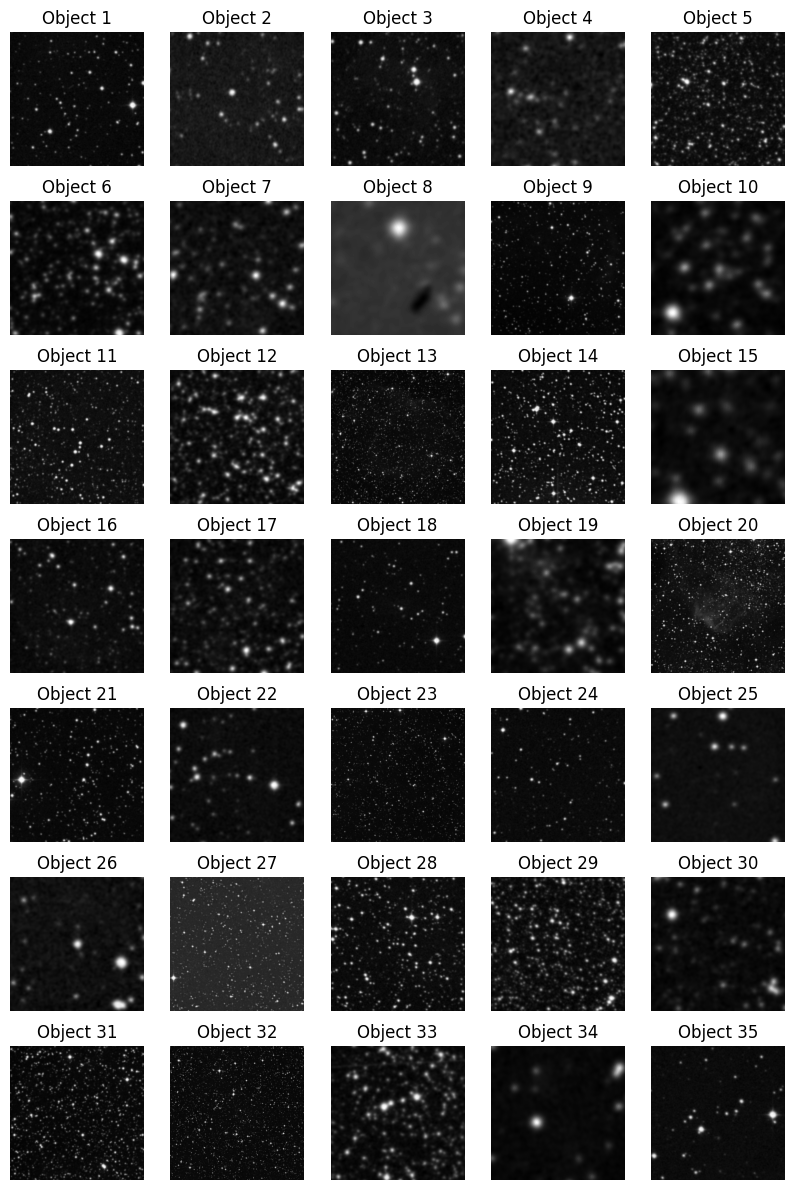

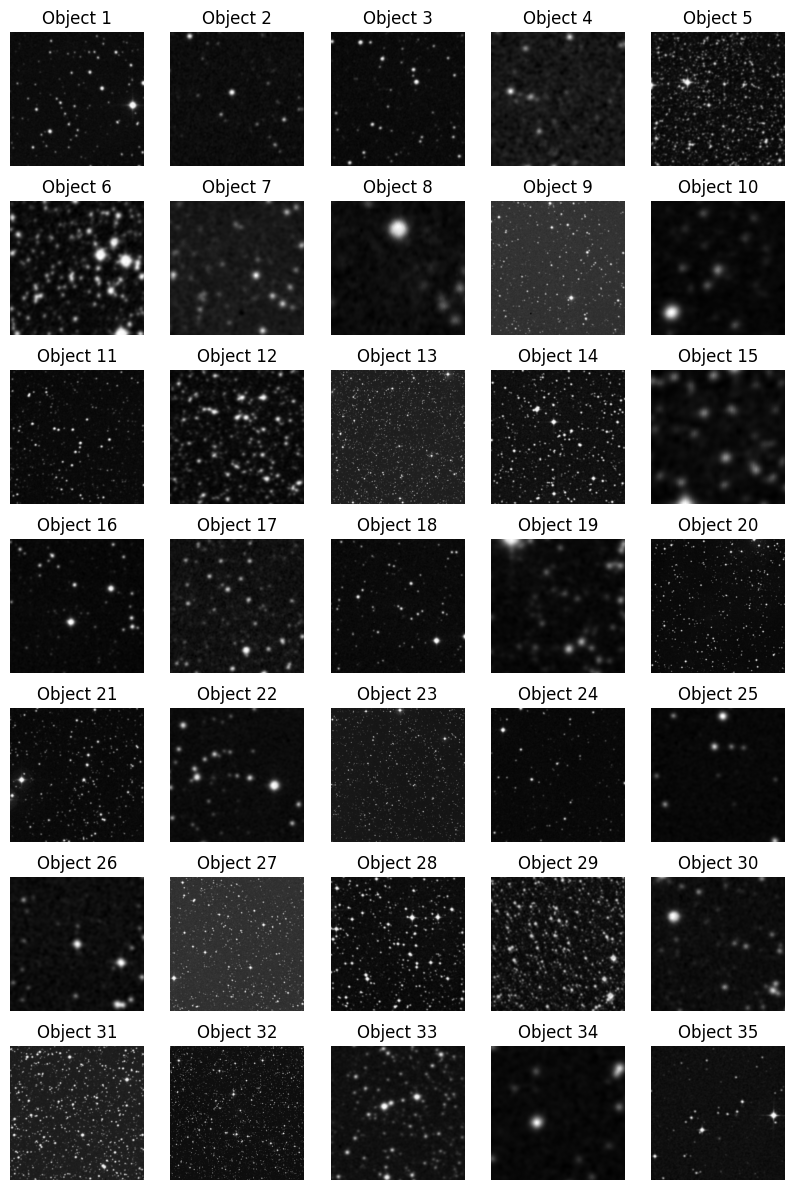

In [2]:
import matplotlib.pyplot as plt

# Create a figure with a 5x7 grid of subplots
fig, axs = plt.subplots(7, 5, figsize=(10, 15))
axs = axs.flatten()

# Loop over the first 35 images and plot them on the subplots
for i in range(35):
    axs[i].imshow(all_images[i,:,:,0], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Object {i+1}')

# Show the plots
plt.show()


# Create a figure with a 5x7 grid of subplots
fig, axs = plt.subplots(7, 5, figsize=(10, 15))
axs = axs.flatten()

# Loop over the first 35 images and plot them on the subplots
for i in range(35):
    axs[i].imshow(all_images[i,:,:,1], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Object {i+1}')

# Show the plots
plt.show()

In [2]:
import csv
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
import numpy as np
import cv2
from astropy.coordinates import Angle
from urllib.parse import urlencode
from sklearn.preprocessing import minmax_scale
import re
import requests
from astroquery.simbad import Simbad

Simbad.TIMEOUT = 240 # sets the timeout

# define the number of random positions to select
num_positions = 200

# randomly generate RA and Dec coordinates within a certain range
ra = np.random.uniform(low=0, high=360, size=num_positions)
dec = np.random.uniform(low=-90, high=90, size=num_positions)

# randomly select FOV values within the range of 0.7 to 20 arcminutes
fov_range = np.arange(0.7, 20, 0.1)/60 # arc minutes/60 = degrees
fov_choices = np.random.choice(fov_range, size=num_positions)

not_all_images = []

for i in range(num_positions):
    ra_deg = ra[i]
    dec_deg = dec[i]

    fov = fov_choices[i]

    # define the resolution of the image
    largeur = 512
    hauteur = 512

    # Construct the request URLs for the hips2fits service for the DSS2 Red and DSS2 Blue filters
    query_params_red={
        'hips':'DSS2 red',
        'ra':ra_deg,
        'dec':dec_deg,
        'fov':fov,
        'width':largeur,
        'height':hauteur
    }
    url_red = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_red)}'

    query_params_blue={
        'hips':'DSS2 blue',
        'ra':ra_deg,
        'dec':dec_deg,
        'fov':fov,
        'width':largeur,
        'height':hauteur
    }
    url_blue = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_blue)}'

    # Download the images from the Aladin Sky Atlas server
    not_hdul_red = fits.open(url_red)
    not_hdul_blue = fits.open(url_blue)

    not_image_red = not_hdul_red[0].data
    not_image_blue = not_hdul_blue[0].data

    # Normalize the pixel values between 0 and1 for each filter
    not_image_min_red = np.min(not_image_red)
    not_image_max_red = np.max(not_image_red)
    not_image_norm_red = (not_image_red - not_image_min_red) / (not_image_max_red - not_image_min_red)

    not_image_min_blue = np.min(not_image_blue)
    not_image_max_blue = np.max(not_image_blue)
    not_image_norm_blue = (not_image_blue - not_image_min_blue) / (not_image_max_blue - not_image_min_blue)

    # Combine the preprocessed images from both filters into a single dataset
    not_images = np.stack([not_image_norm_red, not_image_norm_blue], axis=-1)

    # Append the images to the list of all images
    not_all_images.append(not_images)

# Convert the list of all images to a NumPy array
not_all_images = np.array(not_all_images)

C:\Users\Pierre Bibal\AppData\Local\Temp\ipykernel_2292\2563375134.py:75: RuntimeWarning: overflow encountered in scalar subtract
  image_norm_red = (image_red - image_min_red) / (image_max_red - image_min_red)


KeyboardInterrupt: 

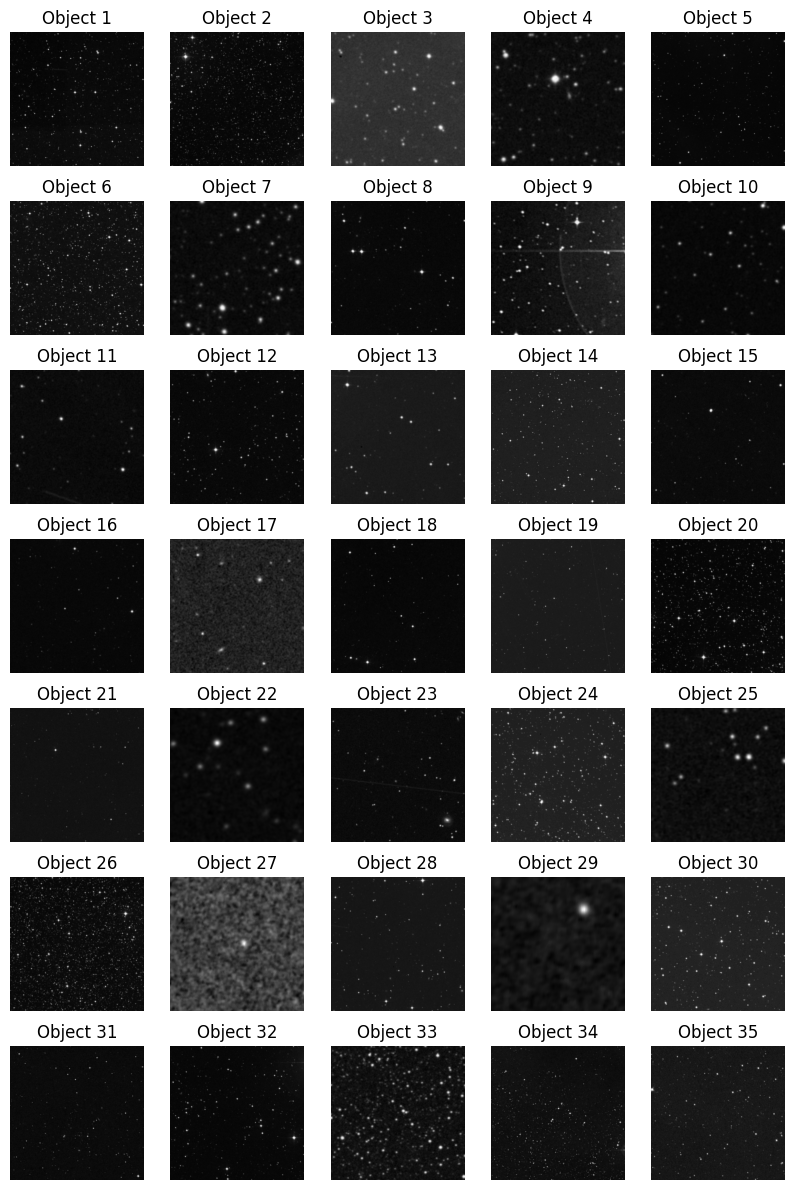

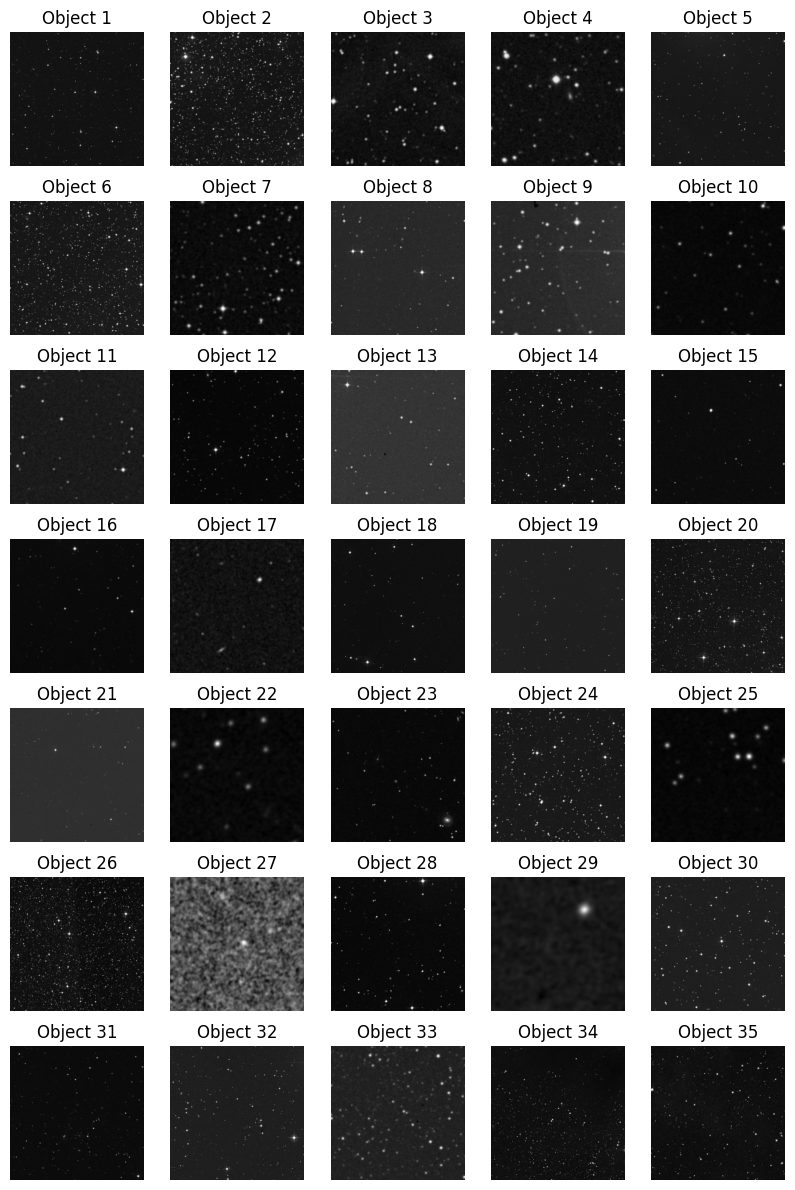

In [4]:
import matplotlib.pyplot as plt

# Create a figure with a 5x7 grid of subplots
fig, axs = plt.subplots(7, 5, figsize=(10, 15))
axs = axs.flatten()

# Loop over the first 35 images and plot them on the subplots
for i in range(35):
    axs[i].imshow(not_all_images[i,:,:,0], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Object {i+1}')

# Show the plots
plt.show()


# Create a figure with a 5x7 grid of subplots
fig, axs = plt.subplots(7, 5, figsize=(10, 15))
axs = axs.flatten()

# Loop over the first 35 images and plot them on the subplots
for i in range(35):
    axs[i].imshow(not_all_images[i,:,:,1], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Object {i+1}')

# Show the plots
plt.show()

In [14]:
import numpy as np
from PIL import Image
import os

# Define the directory where the images will be saved
base_dir = "image_dataset"
os.makedirs(base_dir, exist_ok=True)

# Define the subdirectories for the classes
train_dir = os.path.join(base_dir, "train")
os.makedirs(train_dir, exist_ok=True)

test_dir = os.path.join(base_dir, "test")
os.makedirs(test_dir, exist_ok=True)

image_dir_train = os.path.join(train_dir, "images")
not_image_dir_train = os.path.join(train_dir, "not_images")
os.makedirs(image_dir_train, exist_ok=True)
os.makedirs(not_image_dir_train, exist_ok=True)

image_dir_test = os.path.join(test_dir, "images")
not_image_dir_test = os.path.join(test_dir, "not_images")
os.makedirs(image_dir_test, exist_ok=True)
os.makedirs(not_image_dir_test, exist_ok=True)

# Split the data into train and test sets
train_images = all_images[:int(0.8*len(all_images))]
test_images = all_images[int(0.8*len(all_images)):]

train_not_images = not_all_images[:int(0.8*len(not_all_images))]
test_not_images = not_all_images[int(0.8*len(not_all_images)):]

# Save the images to their respective directories
for i, img in enumerate(train_images):
    img_path = os.path.join(image_dir_train, f"image_{i}.jpg")
    if len(img.shape) == 2:
        # Convert 2D grayscale image to 3D RGB image
        img = np.stack([img, img, img], axis=-1)
    elif len(img.shape) == 3 and img.shape[-1] == 2:
        # Convert 2D color image with 2 channels to 3D RGB image
        img = np.concatenate([img, np.zeros_like(img)], axis=-1)
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        if pil_img.mode == 'RGBA':
            pil_img = pil_img.convert('RGB')
        pil_img.save(img_path)

for i, img in enumerate(train_not_images):
    img_path = os.path.join(not_image_dir_train, f"not_image_{i}.jpg")
    if len(img.shape) == 2:
        # Convert 2D grayscale image to 3D RGB image
        img = np.stack([img, img, img], axis=-1)
    elif len(img.shape) == 3 and img.shape[-1] == 2:
        # Convert 2D color image with 2 channels to 3D RGB image
        img = np.concatenate([img, np.zeros_like(img)], axis=-1)
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        if pil_img.mode == 'RGBA':
            pil_img = pil_img.convert('RGB')
        pil_img.save(img_path)

for i, img in enumerate(test_images):
    img_path = os.path.join(image_dir_test, f"image_{i}.jpg")
    if len(img.shape) == 2:
        # Convert 2D grayscale image to 3D RGB image
        img = np.stack([img, img, img], axis=-1)
    elif len(img.shape) == 3 and img.shape[-1] == 2:
        # Convert 2D color image with 2 channels to 3D RGB image
        img = np.concatenate([img, np.zeros_like(img)], axis=-1)
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        if pil_img.mode == 'RGBA':
            pil_img = pil_img.convert('RGB')
        pil_img.save(img_path)

for i, img in enumerate(test_not_images):
    img_path = os.path.join(not_image_dir_test, f"not_image_{i}.jpg")
    if len(img.shape) == 2:
        # Convert 2D grayscale image to 3D RGB image
        img = np.stack([img, img, img], axis=-1)
    elif len(img.shape) == 3 and img.shape[-1] == 2:
        # Convert 2D color image with 2 channels to 3D RGB image
        img = np.concatenate([img, np.zeros_like(img)], axis=-1)
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        if pil_img.mode == 'RGBA':
            pil_img = pil_img.convert('RGB')
        pil_img.save(img_path)

C:\Users\Pierre Bibal\AppData\Local\Temp\ipykernel_12720\2725974896.py:42: RuntimeWarning: invalid value encountered in cast
  pil_img = Image.fromarray((img * 255).astype(np.uint8))


In [ ]:
import csv
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
import numpy as np
import cv2
from astropy.coordinates import Angle
from urllib.parse import urlencode
from sklearn.preprocessing import minmax_scale
import re
import requests


# Load and preprocess the images of the planetary nebulae
image_size = 512
fov_threshold = 0.7/60 # arc minutes/60 = degrees

images = []
with open('output33.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # Skip the header row
    for row in csv_reader:
        ra = row[2]
        dec = row[3]
        fov_str = row[4]

        # Extract the numeric value from the FOV information string using regular expressions
        match = re.match(r'(\d+(\.\d+)?)', fov_str)
        fov = float(match.group(0))/60.0

        # Select only the objects with size > 0.7 arc min
        if fov > fov_threshold:
            # Convert RA and Dec to degrees
            ra_deg = Angle(ra, unit=u.hourangle).degree
            dec_deg = Angle(dec, unit=u.deg).degree

            # Convert the image size to pixels
            largeur = hauteur = image_size

            # Construct the request URL for the hips2fits service
            query_params={
                'hips':'DSS2 red',
                'ra':ra_deg,
                'dec':dec_deg,
                'fov':fov,
                'width':largeur,
                'height':hauteur
            }
            url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}'

            # Download the image from the Aladin Sky Atlas server
            hdul = fits.open(url)
            image = hdul[0].data

            # Normalize the pixel values between 0 and 1
            image_min = np.min(image)
            image_max = np.max(image)
            image = (image - image_min) / (image_max - image_min)

            # Add the preprocessed image to the list of images
            images.append(image)

images = np.array(images)

http://planetarynebulae.net/EN/page_np_nonpubliees.php